In [33]:
# Dependencies and set up
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# I think that's it

In [34]:
# Build up the first dataframe from Nathon's lovely main dataset csv.
csv_filepath = os.path.join('..', 'Outputs', 'United_States_City_Data.csv')
beer_cost_df = pd.read_csv(csv_filepath,delimiter=",")
beer_cost_df.dropna(inplace=True)
beer_cost_df

City  Avg Meal Inexp. Restaurant  \
8              Albany                       13.50   
11        Albuquerque                       15.00   
22            Anaheim                       20.00   
23          Anchorage                       19.75   
26          Ann Arbor                       15.00   
...               ...                         ...   
980    Virginia Beach                       23.00   
989      Walnut Creek                       15.00   
996        Washington                       18.75   
1020  West Palm Beach                       15.00   
1031          Wichita                       12.00   

      Avg Meal (For 2) Mid-Range Restaurant   McMeal at McDonalds  \
8                                      65.00                9.000   
11                                     65.00                8.225   
22                                     65.00                9.000   
23                                     75.00                9.500   
26                                     80.00                8.320   
...                                      ...                  ...   
980                                    80.00               10.000   
989                                    82.50                8.000   
996                                    81.25                9.000   
1020                                   70.00                9.000   
1031                                   45.00                7.500   

      Domestic Beer (Restaurant)  Imported Beer (Restaurant)  Cappuccino  \
8                           5.00                        6.00       3.620   
11                          5.00                        5.00       4.235   
22                          8.35                        7.00       5.030   
23                          6.00                        7.75       4.925   
26                          5.00                        6.00       4.770   
...                          ...                         ...         ...   
980                         6.50                        7.00       5.750   
989                         6.00                        8.00       4.810   
996                         7.25                        8.00       4.850   
1020                        5.00                        5.00       4.570   
1031                        3.50                        5.50       4.000   

      Coke/Pepsi (Restaurant)  Water (Restaurant)   Milk  ...  \
8                       2.020               1.390  1.070  ...   
11                      1.915               1.455  0.990  ...   
22                      3.010               1.890  1.120  ...   
23                      2.720               2.085  1.115  ...   
26                      2.540               2.110  0.880  ...   
...                       ...                 ...    ...  ...   
980                     2.370               2.000  0.990  ...   
989                     3.000               2.020  2.240  ...   
996                     2.470               2.120  1.010  ...   
1020                    2.200               1.770  1.120  ...   
1031                    1.920               1.250  0.810  ...   

      Leather Business Shoes  1bd Apt. (City Center)  \
8                     99.140                 1300.00   
11                    88.755                 1337.97   
22                    76.670                 1866.67   
23                   119.060                 1341.50   
26                   108.500                 1800.00   
...                      ...                     ...   
980                  128.170                 1510.00   
989                   96.670                 2566.67   
996                  133.500                 2307.11   
1020                  90.750                 2100.00   
1031                 113.570                 1166.67   

      1bd Apt. (Outside Center)  3bd Apt. (City Center)  \
8                      1100.000                2000.000   
11                     1097.915                2332.145   
22     

In [35]:
# See how many unique cities/states we have data for in this set.
print(f"Number of unique cities: {len(set(beer_cost_df['City']))}")


Number of unique cities: 133


In [36]:
# Should've asked earlier, but what columns do we have?
beer_cost_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 8 to 1031
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    133 non-null    object 
 1   Avg Meal Inexp. Restaurant              133 non-null    float64
 2   Avg Meal (For 2) Mid-Range Restaurant   133 non-null    float64
 3   McMeal at McDonalds                     133 non-null    float64
 4   Domestic Beer (Restaurant)              133 non-null    float64
 5   Imported Beer (Restaurant)              133 non-null    float64
 6   Cappuccino                              133 non-null    float64
 7   Coke/Pepsi (Restaurant)                 133 non-null    float64
 8   Water (Restaurant)                      133 non-null    float64
 9   Milk                                    133 non-null    float64
 10  Bread (Loaf)                            133 non-null    float

In [37]:
# Isolate the columns I want to keep.
avg_beer_cost_df = beer_cost_df[['City','Domestic Beer (Restaurant)','Imported Beer (Restaurant)','Domestic Beer (Bottle)','Avg Meal Inexp. Restaurant']]
avg_beer_cost_df = avg_beer_cost_df.drop_duplicates()
len(avg_beer_cost_df)

133

In [38]:
# Reset Index
avg_beer_cost_df=avg_beer_cost_df.reset_index()
avg_beer_cost_df.head()

index         City  Domestic Beer (Restaurant)  Imported Beer (Restaurant)  \
0      8       Albany                        5.00                        6.00   
1     11  Albuquerque                        5.00                        5.00   
2     22      Anaheim                        8.35                        7.00   
3     23    Anchorage                        6.00                        7.75   
4     26    Ann Arbor                        5.00                        6.00   

   Domestic Beer (Bottle)  Avg Meal Inexp. Restaurant  
0                    3.00                       13.50  
1                    3.21                       15.00  
2                    3.57                       20.00  
3                    1.67                       19.75  
4                    2.62                       15.00

In [39]:
# I'd like to have a separate dataframe just to hold on to different types of costs.
cost_detail_df = pd.DataFrame(avg_beer_cost_df[["City"]])
cost_detail_df["Domestice Restaurant vs Home"]=""
cost_detail_df["Domestic vs Import"]=""
cost_detail_df["Domestic Beer vs Food"]=""

cost_detail_df.head()

City Domestice Restaurant vs Home Domestic vs Import  \
0       Albany                                                   
1  Albuquerque                                                   
2      Anaheim                                                   
3    Anchorage                                                   
4    Ann Arbor                                                   

  Domestic Beer vs Food  
0                        
1                        
2                        
3                        
4

In [40]:
    for i in range(len(avg_beer_cost_df)):
        city = avg_beer_cost_df.loc[i,"City"]
        domestic_beer = avg_beer_cost_df.loc[i,"Domestic Beer (Restaurant)"]
        imported_beer = avg_beer_cost_df.loc[i,"Imported Beer (Restaurant)"]
        inexp_meal = avg_beer_cost_df.loc[i,"Avg Meal Inexp. Restaurant"]
        domestic_bottle = avg_beer_cost_df.loc[i,"Domestic Beer (Bottle)"]

        domestic_rvh = domestic_beer / domestic_bottle
        domestic_import = domestic_beer / imported_beer
        domestic_food = domestic_beer / inexp_meal

        cost_detail_df.loc[i,"Domestice Restaurant vs Home"] = domestic_rvh
        cost_detail_df.loc[i,"Domestic vs Import"] = domestic_import
        cost_detail_df.loc[i,"Domestic Beer vs Food"] = domestic_food


In [41]:
cost_detail_df.head()

City Domestice Restaurant vs Home Domestic vs Import  \
0       Albany                     1.666667           0.833333   
1  Albuquerque                     1.557632                1.0   
2      Anaheim                     2.338936           1.192857   
3    Anchorage                     3.592814           0.774194   
4    Ann Arbor                     1.908397           0.833333   

  Domestic Beer vs Food  
0               0.37037  
1              0.333333  
2                0.4175  
3              0.303797  
4              0.333333

In [43]:
cost_detail_df.sort_values(by=['Domestic Beer vs Food'],ascending=False,inplace=True)
cost_detail_df.head()

City Domestice Restaurant vs Home Domestic vs Import  \
43    Gig Harbor                     3.271028           1.166667   
58        Juneau                     2.024922           1.083333   
36        Eureka                      2.56917                1.3   
71    Montgomery                       4.6875                1.8   
119  Springfield                     1.547988           0.833333   

    Domestic Beer vs Food  
43               0.583333  
58               0.565217  
36                   0.52  
71               0.514286  
119                   0.5

In [44]:
# Find the top 10 cities with highest profit margin for our bar chart.
top_ten_cities = cost_detail_df[0:10]
top_ten_cities

City Domestice Restaurant vs Home Domestic vs Import  \
43    Gig Harbor                     3.271028           1.166667   
58        Juneau                     2.024922           1.083333   
36        Eureka                      2.56917                1.3   
71    Montgomery                       4.6875                1.8   
119  Springfield                     1.547988           0.833333   
114   Scottsdale                     2.586207           0.857143   
87      Pasadena                     2.588997                1.0   
57   Jersey City                     4.895105                1.0   
124        Tempe                     2.214022                1.0   
100      Redding                     2.076125                1.0   

    Domestic Beer vs Food  
43               0.583333  
58               0.565217  
36                   0.52  
71               0.514286  
119                   0.5  
114              0.489796  
87               0.484848  
57               0.466667  
124              0.461538  
100              0.428571

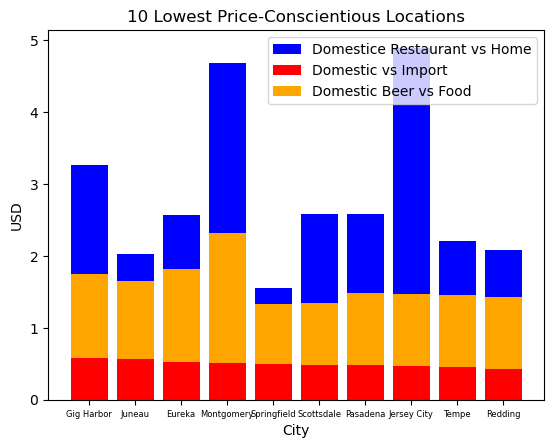

In [52]:
# Let's use the top 10 to make a stacked bar chart of our expenses. 
plt.bar(top_ten_cities['City'], top_ten_cities["Domestice Restaurant vs Home"], color='b')
plt.bar(top_ten_cities['City'], top_ten_cities["Domestic Beer vs Food"], color='r')
plt.bar(top_ten_cities['City'], top_ten_cities["Domestic vs Import"], color='orange',bottom=top_ten_cities["Domestic Beer vs Food"])

plt.tick_params(axis='x', labelsize=6)
plt.title('10 Lowest Price-Conscientious Locations')
plt.ylabel('USD')
plt.xlabel('City')
plt.legend(["Domestice Restaurant vs Home","Domestic vs Import","Domestic Beer vs Food"])

# Save the figure
filename=os.path.join('..', 'Outputs', 'DomesticBeerPrices.png')
plt.savefig(filename)
    
plt.show()